<a href="https://colab.research.google.com/github/Luseat/Prediksi-BTC-USD/blob/main/BTC_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error
import yfinance as yf
import seaborn as sns
import matplotlib.dates as mdates

**Import Data Bitcoin**

In [9]:
start_date = "2018-01-01"
end_date = "2025-02-22" # 2024-12-22

data = yf.Ticker("BTC-USD")
data = data.history(start=start_date, end=end_date)
del data["Dividends"]
del data["Stock Splits"]
forecastData = data.copy()
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-17 00:00:00+00:00,96179.007812,97032.234375,95243.546875,95773.382812,27336550690
2025-02-18 00:00:00+00:00,95773.812500,96695.375000,93388.835938,95539.546875,37325720482
2025-02-19 00:00:00+00:00,95532.531250,96855.593750,95011.968750,96635.609375,28990872862
2025-02-20 00:00:00+00:00,96632.679688,98767.195312,96442.671875,98333.937500,31668022771
2025-02-21 00:00:00+00:00,98340.671875,99497.968750,94852.960938,96125.546875,49608706470


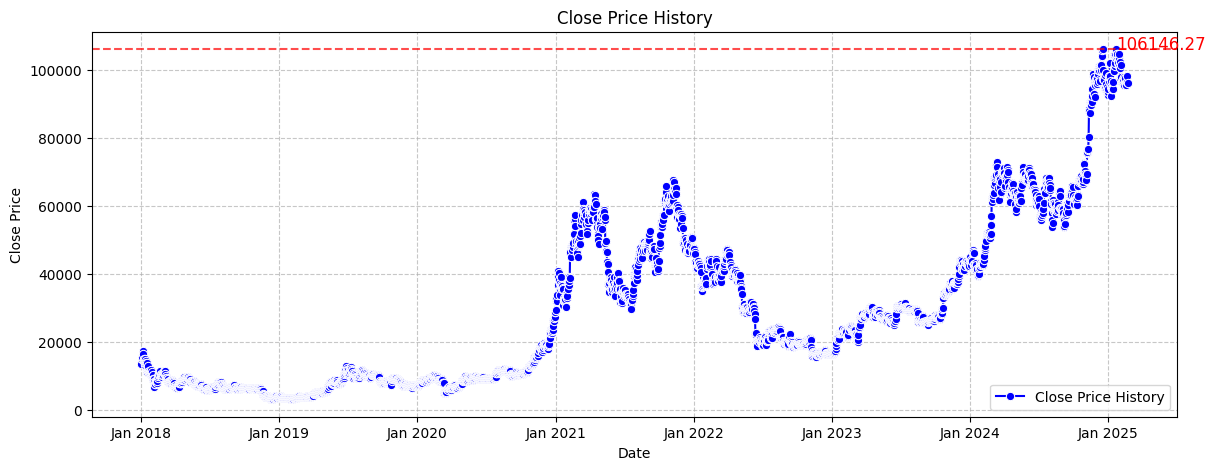

In [16]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=data, x=data.index, y='Close', label='Close Price History', marker='o', color='blue')

max_price = data['Close'].max()
max_price_date = data['Close'].idxmax()

# Annotate the highest price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext = (max_price_date, max_price + 2),
             fontsize=12, color='red')
plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()